**Name - Atharva Gondkar**

**Class - IS2**

**Roll Number - 2176032**

**Enrollment Number - MITU17BTMA0013**


---

**EXPERIMENT #2** 

**DATE: 01-09-2020**

---


#**TITLE : ML II ASSIGNMENT 2**

---


#**AIM**

Perform Image classification using CIFAR-10 dataset.


#**OBJECTIVE**
1. Implement FFNN for Image Classification using CIFAR-10 dataset.



**DRIVE LINK** - *https://drive.google.com/drive/u/0/folders/1VFRRP-IpjH_iq-Beojnorny4Rm53uT6E*

  **Notebook, code, pdf, output snapshots have been stored on the above given drive link.*

# **CIFAR10**

In [ ]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
xtr.shape

(50000, 32, 32, 3)

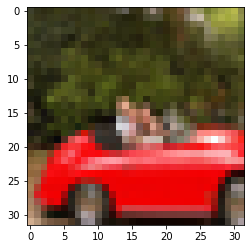

In [ ]:
plt.imshow(xtr[99], cmap='gray')

In [ ]:
ytr[99]

array([1], dtype=uint8)

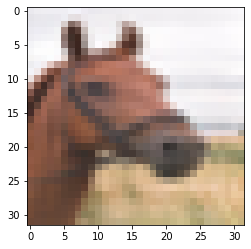

In [ ]:
plt.imshow(xte[99], cmap='gray')

In [ ]:
yte[99]

array([7], dtype=uint8)

In [ ]:
ytr=tcg(ytr)
yte=tcg(yte)

In [ ]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [ ]:
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu', kernel_initializer='he_uniform'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
  
])

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=64)

Epoch 1/13
782/782 [==============================] - 3s 3ms/step - loss: 1.8873 - accuracy: 0.3270 - val_loss: 1.7314 - val_accuracy: 0.3858
Epoch 2/13
782/782 [==============================] - 2s 3ms/step - loss: 1.7034 - accuracy: 0.3978 - val_loss: 1.6928 - val_accuracy: 0.3876
Epoch 3/13
782/782 [==============================] - 2s 3ms/step - loss: 1.6259 - accuracy: 0.4250 - val_loss: 1.6071 - val_accuracy: 0.4357
Epoch 4/13
782/782 [==============================] - 2s 3ms/step - loss: 1.5671 - accuracy: 0.4484 - val_loss: 1.5501 - val_accuracy: 0.4555
Epoch 5/13
782/782 [==============================] - 2s 3ms/step - loss: 1.5304 - accuracy: 0.4586 - val_loss: 1.5393 - val_accuracy: 0.4487
Epoch 6/13
782/782 [==============================] - 2s 3ms/step - loss: 1.4948 - accuracy: 0.4706 - val_loss: 1.5043 - val_accuracy: 0.4658
Epoch 7/13
782/782 [==============================] - 2s 3ms/step - loss: 1.4652 - accuracy: 0.4824 - val_loss: 1.5158 - val_accuracy: 0.4651
Epoch 

In [ ]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 3s 2ms/step - loss: 1.3076 - accuracy: 0.5397


[1.3075944185256958, 0.5396999716758728]

In [ ]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 1s 2ms/step - loss: 1.3998 - accuracy: 0.4979


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3997923135757446
Test accuracy: 0.49790000915527344


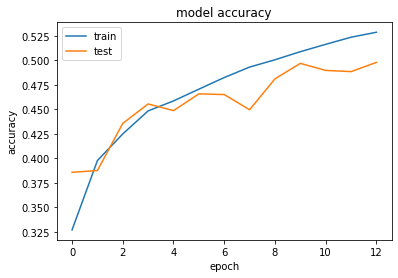

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

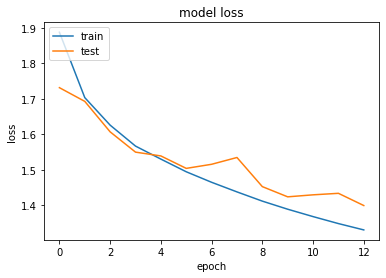

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
np.save('my_history.npy',history.history)

In [ ]:
model.save('FFNN_CIFAR10.h5')